In [ ]:
import pickle

# Save model and vectorizer
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas scikit-learn numpy matplotlib


In [2]:
# fake_news_detection.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load datasets
fake = pd.read_csv("C:/Users/As/Downloads/Fake.csv")
real = pd.read_csv("C:/Users/As/Downloads/True.csv")


In [21]:
fake.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [20]:
real.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [5]:
# Add labels
fake["label"] = 0  # FAKE
real["label"] = 1  # REAL


In [6]:
# Combine the datasets
df = pd.concat([fake, real], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle

In [22]:
df

,title,text,subject,date,label
0,Rand Paul Throws A Fit After Being Kicked Out...,Rand Paul and Carly Fiorina have recently rece...,News,"January 12, 2016",0
1,Turkish asylum applications in Germany jump 55...,BERLIN (Reuters) - The number of Turks seeking...,worldnews,"September 18, 2017",1
2,“Kill Him…Kill Him”…GOOD SAMARITAN TRYING TO S...,Another disturbing teen melee broke out inside...,left-news,"May 16, 2015",0
3,"Month into trial, North Korean 'masterminds' b...",KUALA LUMPUR (Reuters) - One month into the tr...,worldnews,"November 3, 2017",1
4,Watch: Joe Biden Just Wrecked Trump In Six Wo...,Former Vice President Joe Biden was asked on M...,News,"November 13, 2017",0
...,...,...,...,...,...
44893,This Explains A Lot: Trump Said To Have Fox N...,Why has Fox News been Donald Trump s cheerlead...,News,"April 4, 2016",0
44894,[VIDEO] SHERIFF CLARKE EXPOSES THE LEFT: “This...,"A bunch of thugs, a bunch of creeps, criminal...",left-news,"Aug 11, 2015",0
44895,"WATCH: CNN DOES SEGMENT From Bunker In Hawaii,...",CNN host Erin Burnett started out her segment ...,politics,"Aug 10, 2017",0
44896,Prominent Holocaust Attorney Files MASSIVE La...,Donald Trump is NOT going to like this at all....,News,"December 8, 2016",0


In [7]:
# Use only 'text' and 'label'
X = df['text']
y = df['label']


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:
# Passive Aggressive Classifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [11]:
# Predict
y_pred = model.predict(X_test_tfidf)

In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 99.32%


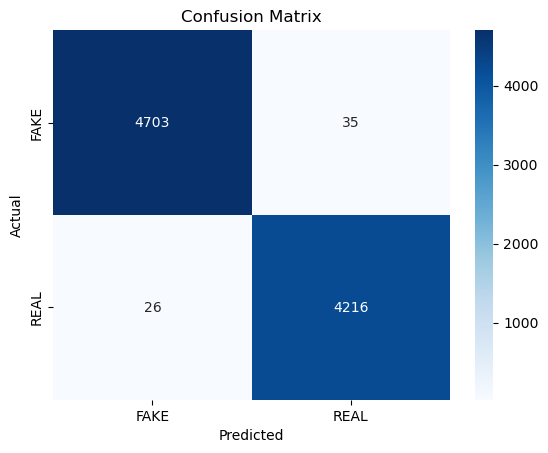

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Function to predict whether a news is fake or real
def predict_news(news):
    transformed = vectorizer.transform([news])
    prediction = model.predict(transformed)
    return "REAL" if prediction[0] == 1 else "FAKE"



In [16]:
# Use it
sample_news = input("\nEnter the news content to check if it's FAKE or REAL:\n")
result = predict_news(sample_news)
print(f"\nPrediction: {result}")



Enter the news content to check if it's FAKE or REAL:
 Donald Trump denies offering Iran any incentives for nuclear talks, contrasting his stance with Obama's JCPOA. This denial follows reports of potential US economic incentives in exchange for Iran halting uranium enrichment. Trump vehemently refuted these reports, labeling them as "fake news" and a "hoax," while tensions remain high after recent strikes on Iranian nuclear facilities.Read More 'Not offering Iran anything': Donald Trump refuses to talk with Tehran; attacks Obama-era policy US President Donald Trump US President Donald Trump said that he is "not talking or giving anything" to Tehran after the deputy foreign minister has put a condition on any future diplomatic and nuclear talks with America. In a post on Truth Social, Trump said, "Tell phony Democrat Senator Chris Coons that I am not offering Iran ANYTHING, unlike Obama, who paid them $Billions under the stupid “road to a Nuclear Weapon JCPOA (which would now be expir


Prediction: FAKE


In [17]:
# Use it
sample_news = input("\nEnter the news content to check if it's FAKE or REAL:\n")
result = predict_news(sample_news)
print(f"\nPrediction: {result}")



Enter the news content to check if it's FAKE or REAL:
 For about a decade, Livemint—News Desk has been a credible source for authentic and timely news, and well-researched analysis on national news, business, personal finance, corporates, politics and geopolitics. We bring the latest updates on all the listed companies on BSE and NSE, startups, mutual funds, Union ministries, geopolitics, and untapped human interest stories from around the world, helping our readers to stay informed on the latest developments around the globe. Our Coverage Areas 1. Companies: Comprehensive news and analysis on listed and unlisted companies, corporate announcements, corporate chatter, C-suite, business trends, hiring alerts, layoffs, work-life balance, world's top billionaires and richest and more. 2. Personal finance: Insights into mutual funds, small savings schemes like - PPF, SSY, post office savings scheme, stock to watch, personal loans, credit cards, top bank FDs, real estate, income tax and mor


Prediction: REAL
